# Expedia Hotel Searches Prediction Model

I will be working through a practical example of each one of the steps in the Machine Learning model building pipeline. There will be a notebook for each one of the Machine Learning Pipeline steps:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for step 1: Data Analysis**

We will use the house price dataset available on [Kaggle.com](https://www.kaggle.com/competitions/expedia-personalized-sort). See below for more details.

=========================================================================

## Predicting Booking Price of Hotel

The aim of the project is to build a machine learning model to predict the booking price of hotel based on different explanatory variables describing the Expedia search engine and consumer preferences. 

### Why is this important? 

Predicting hotel prices is useful to identify consumer spending trends, and to determine whether the price advertised on Expedia is over or under-estimated, booking searches result in the most affordable prices, etc.

### What is the objective of the machine learning model?

# Expedia Hotel Search Dataset: Data Analysis

In the following cells, I will analyse the variables of the Expedia Hotel Search Dataset from Kaggle. I will take you through the different aspects of the analysis of the variables, and introduce you to the meaning of each of the variables in the dataset as well. If you want to know more about this dataset, visit [Kaggle.com](https://www.kaggle.com/competitions/expedia-personalized-sort).

Import libraries for handling, plotting, and display all columns of the dataframe.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

Let's go ahead and load the train dataset.

In [2]:
train = pd.read_csv('train.csv')

It is also important to consider that majority of the columns are numeric data types.

In [59]:
cols = train.columns
num_cols = train._get_numeric_data().columns
num_cols

Index(['srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'click_bool',
       'gross_bookings_usd', 'booking_bool'],
      dtype='object')

#### Data Cleaning

Find out which variables of the dataset contain missing values.

In [3]:
train.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        9412233
visitor_hist_adr_usd           9409918
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                14630
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           2178380
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      9281966
orig_destination_distance

Appended to this dataset that we want to use are the following:

1. Hotel characteristics
2. Location attractiveness of hotels
3. User’s aggregate purchase history

We see that majority of values in some columns are null, to prevent us from making some very bad models it is safe to remove ‘comp1_rate’, ‘comp1_inv’, and ‘comp1_rate_percent_diff’ to the 8th competitive level.

In [4]:
train.drop(['comp1_rate','comp1_inv','comp1_rate_percent_diff'], axis=1, inplace=True)

In [5]:
train.drop(['comp2_rate','comp2_inv','comp2_rate_percent_diff'], axis=1, inplace=True)

In [6]:
train.drop(['comp3_rate','comp3_inv','comp3_rate_percent_diff'], axis=1, inplace=True)

In [7]:
train.drop(['comp4_rate','comp4_inv','comp4_rate_percent_diff'], axis=1, inplace=True)

In [8]:
train.drop(['comp5_rate','comp5_inv','comp5_rate_percent_diff'], axis=1, inplace=True)

In [9]:
train.drop(['comp6_rate','comp6_inv','comp6_rate_percent_diff'], axis=1, inplace=True)

In [10]:
train.drop(['comp7_rate','comp7_inv','comp7_rate_percent_diff'], axis=1, inplace=True)

In [11]:
train.drop(['comp8_rate','comp8_inv','comp8_rate_percent_diff'], axis=1, inplace=True)

Let evaluate the missing values in this dataset without the competitive variables

In [12]:
train.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        9412233
visitor_hist_adr_usd           9409918
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                14630
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           2178380
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      9281966
orig_destination_distance

Once we evaluate the missing value after dropping the price competitiveness variables, we can see that the hotel search variables based on the user’s aggregate purchase history suffer from no missing data. 

#### Matrix Analysis 

Finding the most predictive variables for maximizing hotel purchases starts with printing a correlation matrix. Sorting the highest positive and negative search and hotel variables will give an idea of which variables to select for the time series analysis.

In [13]:
corr_mat = train.corr(method='pearson')
sorted_mat = corr_mat.unstack().sort_values(axis=0, ascending=False)

# Select the upper triangular in the correlation matrix and not include diagonal elements
upper_tri = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
sorted_upper_mat = upper_tri.unstack().sort_values(axis=0, ascending=False).head(10)
print(sorted_upper_mat)

# Select the lower triangular in the correlation matrix and not include diagonal elements
lower_tri = corr_mat.where(np.tril(np.ones(corr_mat.shape),k=1).astype(np.bool))
sorted_lower_mat = lower_tri.unstack().sort_values(axis=0, ascending=True).head(10)
print(sorted_lower_mat)

booking_bool               click_bool                     0.782697
visitor_hist_adr_usd       visitor_hist_starrating        0.490974
prop_country_id            visitor_location_country_id    0.482386
srch_room_count            srch_adults_count              0.465433
gross_bookings_usd         srch_length_of_stay            0.448546
prop_location_score2       prop_location_score1           0.435277
orig_destination_distance  site_id                        0.342710
                           srch_booking_window            0.321278
prop_brand_bool            prop_country_id                0.309949
prop_review_score          prop_starrating                0.306001
dtype: float64
prop_country_id              orig_destination_distance     -0.363832
site_id                      prop_country_id               -0.313794
                             visitor_location_country_id   -0.304294
visitor_location_country_id  site_id                       -0.304294
srch_length_of_stay          srch_satur

Two triangular parts of the correlation matrix that does not include the diagonal elements are the:

#### Upper Triangular (positive correlations)

To observe the relationship of hotel prices against the country ID where the hotel and customer are located, we can see a strong positive correlation between 'prop_country_id' (ID of the country the hotel is located in) and 'visitor_location_country_id' (ID of the country the customer is located in). 

In addition, the positive correlation between 'srch_room_count' (number of nights stay that was searched) and 'srch_adults_count' (number of adults specified in the hotel room) focuses on the main demographic effect on user aggregate purchasing history. This could be beneficial in strengthening the relationship between hotel prices against search preferences.

#### Lower Triangular (negative correlations)

To observe the relationship of hotel prices against explanatory hotel search variables, we can see a strong negative correlation between 'srch_length_of_stay' (number of nights stay that was searched) and 'srch_saturday_night_bool' (boolean value of Saturday night with a length of stay less than or equal to 4 nights). This could be beneficial in predicting the trend in hotel prices based on consumer preferences.  


Note: test.csv does not contain the columns position, click_bool, gross_bookings_usd, nor booking_bool. However, important booking variables like 'srch_booking_window' does exist in test.csv. Visit [Kaggle.com](https://www.kaggle.com/competitions/expedia-personalized-sort)

#### Subset the dataset

From the matrix analysis, select 'prop_id' /  'visitor_location_country_id' / 'srch_room_count' / 'srch_adults_count' specified in the search with the most data points

In [14]:
# prop_id corresponding to 
train['prop_id'].value_counts()

104517    4733
124342    4707
68420     4580
134154    4550
40279     4535
          ... 
69676        1
72761        1
48140        1
8565         1
127084       1
Name: prop_id, Length: 136886, dtype: int64

In [15]:
train['visitor_location_country_id'].value_counts()

219    5778805
100     990487
55      580072
216     434568
220     350433
        ...   
54          31
198         30
146         30
24          29
8           27
Name: visitor_location_country_id, Length: 218, dtype: int64

In [16]:
# Num of rooms specified in search by customer
train['srch_room_count'].value_counts()

1    9045780
2     734315
3      92372
4      25023
5       8053
8       4950
6       4345
7       2692
Name: srch_room_count, dtype: int64

In [17]:
# Num of adults specified in search by customer
train['srch_adults_count'].value_counts()

2    6494969
1    2315541
4     481440
3     475287
6      63323
5      54180
8      20371
7       9693
9       2726
Name: srch_adults_count, dtype: int64

From these four columns, choose the maximum weight on the data to receive a data frame that contains the most predictive hotel search variables.

Load a new dataset that filters these columns: 'prop_id' /  'visitor_location_country_id' / 'srch_room_count' / 'srch_adults_count': 
- prop_id (hotel id) 
- visitor_location_country_id (country id the customer is located in)
- srch_room_count (number of hotel rooms specificed in search) 
- srch_adults_count (number of adults specified in the hotel room)

Define a list of the time series forecasting variables 'date_time' / 'price_usd' / 'srch_length_of_stay' / 'srch_booking window' / 'srch_saturday_night_bool': 
- date_time (date and time of the search)
- price_usd (displayed price of the hotel for the given search)
- srch_length_of_stay (number of nights stay that was searched)
- srch_booking_window (number of days in the future the hotel stay started from the search date)
- srch_saturday_night_bool (+1 if the hotel stay includes a Saturday night with a length of stay is less than or equal to 4 nights; otherwise 0)

In [90]:
df = train.loc[train['prop_id'] == 104517]
df = df.loc[df['visitor_location_country_id'] == 219]
df = df.loc[df['srch_room_count'] == 1]
df = df.loc[df['srch_adults_count'] == 2]
df = df[['date_time', 'price_usd','srch_length_of_stay','srch_booking_window','srch_saturday_night_bool']]

View first 10 rows of the subset dataset

In [19]:
df.head(10)

,date_time,price_usd,srch_length_of_stay,srch_booking_window,srch_saturday_night_bool
3152,2013-01-03 20:48:24,186.0,3,6,0
10560,2013-04-29 09:39:50,246.0,2,245,0
11127,2013-03-25 19:43:44,52.0,1,7,0
19171,2013-05-19 19:52:42,68.0,5,42,0
25358,2012-11-14 17:18:51,46.0,1,4,0
26107,2013-01-10 19:22:49,50.0,3,46,0
27061,2013-03-27 14:49:27,122.0,1,100,1
29088,2013-05-20 08:14:41,209.0,2,5,1
34421,2013-06-27 19:02:34,89.0,3,69,0
36093,2013-05-21 18:49:33,66.0,2,7,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 3152 to 9917395
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_time                 2253 non-null   object 
 1   price_usd                 2253 non-null   float64
 2   srch_length_of_stay       2253 non-null   int64  
 3   srch_booking_window       2253 non-null   int64  
 4   srch_saturday_night_bool  2253 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 105.6+ KB


Describe hotel prices of the dataset

In [21]:
df['price_usd'].describe()

count    2253.000000
mean      112.387106
std       127.080798
min         0.120000
25%        67.000000
50%        99.150000
75%       140.000000
max      5584.000000
Name: price_usd, dtype: float64

##### Simple Data Visualization

C:\Users\14087\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'Time Series of room price by date time of search')

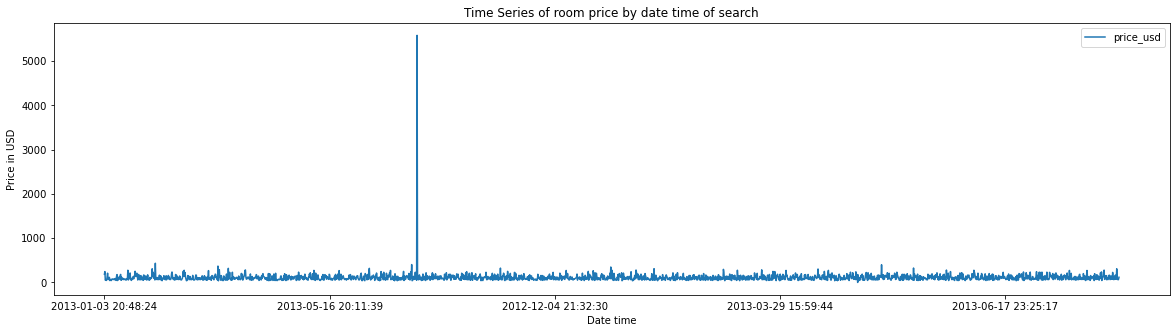

In [22]:
df.plot(x='date_time', y = 'price_usd', figsize = (20,5))
plt.xlabel('Date time')
plt.ylabel('Price in USD')
plt.title('Time Series of room price by date time of search')

We see majority of values in `price_usd` are `< 5584` categorical benchmark so what you can now do is see your stats for data below this

In [91]:
df = df.loc[df['price_usd'] < 5584]
df['price_usd'].describe()

count    2252.000000
mean      109.957438
std        53.391831
min         0.120000
25%        67.000000
50%        99.075000
75%       140.000000
max       434.000000
Name: price_usd, dtype: float64

This seems like a time series problem, but given that I need to perform supervsed learning, I decided to convert the timestamps to numerical entities to help me provide a good inference.

In [24]:
print(df['date_time'].min())
print(df['date_time'].max())

2012-11-01 02:48:30
2013-06-30 16:43:40


As I will now be working on the `date_time` column lets see a few stats which might enable us to choose best conversion types

In [25]:
df['date_time'].describe()
df['date_time'] = pd.to_datetime(df['date_time'])
df.head()

<ipython-input-25-d21d2b46e7a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_time'] = pd.to_datetime(df['date_time'])


,date_time,price_usd,srch_length_of_stay,srch_booking_window,srch_saturday_night_bool
3152,2013-01-03 20:48:24,186.0,3,6,0
10560,2013-04-29 09:39:50,246.0,2,245,0
11127,2013-03-25 19:43:44,52.0,1,7,0
19171,2013-05-19 19:52:42,68.0,5,42,0
25358,2012-11-14 17:18:51,46.0,1,4,0


### Time Series Analysis - Data Visualization

Lets plot a time series of room prices by date time of hotel search:

C:\Users\14087\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'Time Series of room price by date time of search')

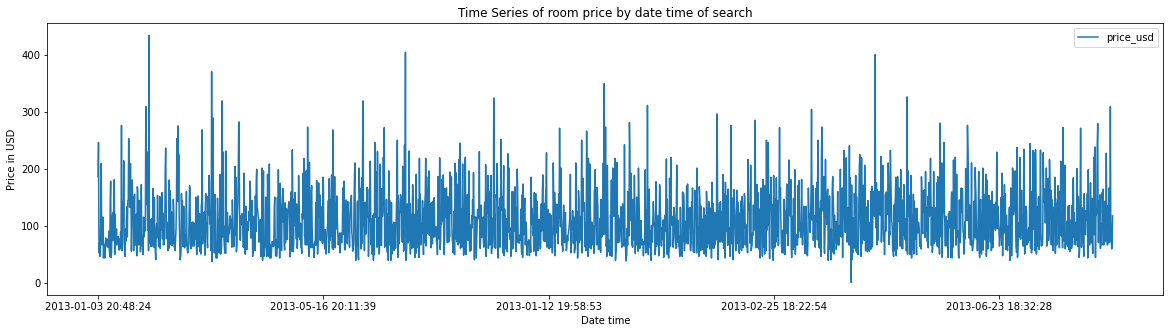

In [92]:
df.plot(x='date_time', y = 'price_usd', figsize = (20,5))
plt.xlabel('Date time')
plt.ylabel('Price in USD')
plt.title('Time Series of room price by date time of search')

I can see that the trend and/or seasonality in your dataset, and determined there is too much noise to discover insights on dates against USD price.

Lets also plot a time series of number of rooms searched by date time of hotel search:

Text(0.5, 1.0, 'Time Series of Number of room search by date time of search')

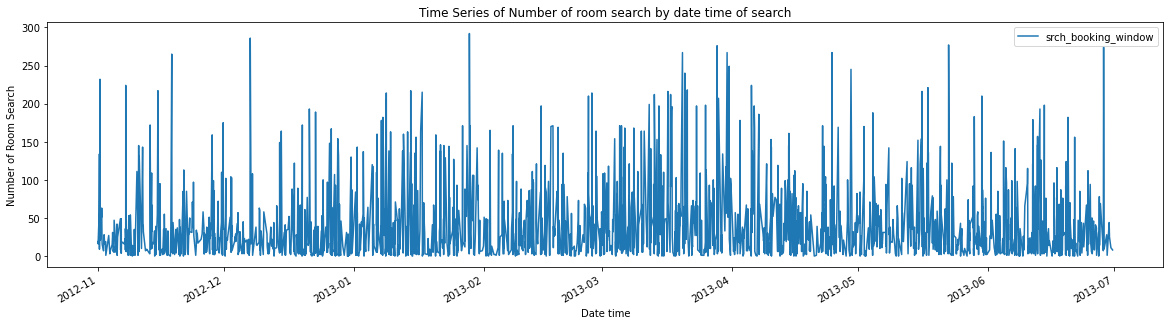

In [27]:
df.plot(x='date_time', y = 'srch_booking_window', figsize = (20,5))
plt.xlabel('Date time')
plt.ylabel('Number of Room Search')
plt.title('Time Series of Number of room search by date time of search')

I can see here that there is even more noise when trying to discover insights on dates against number of room search. There are many outliers in hotel search window and it is tough to find trends/seasonalities than dates against hotel prices.

To visualize the relationship between numerical variables 'price_usd' and 'srch_booking_window' use a scatter plot.

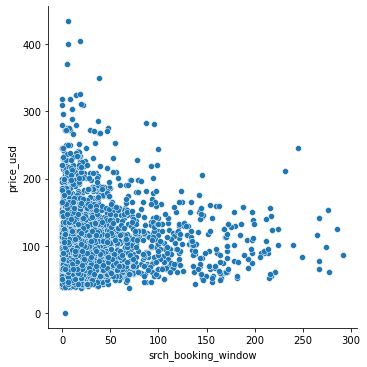

In [28]:
# x and y are the column names of data
sns.relplot(x='srch_booking_window', y='price_usd', data=df)

There is a negative relationship between search booking window and hotel prices. This means that an increase in the  number of days away from the hotel stay by one decreases the hotel price.    

I can also set `hue='srch_saturday_night_bool'` to color our points by whether the hotel stay includes a Saturday night stay. This hue argument is very useful because it allows you to express a third dimension of information between the search booking window and hotel price.

(0.0, 250.0)

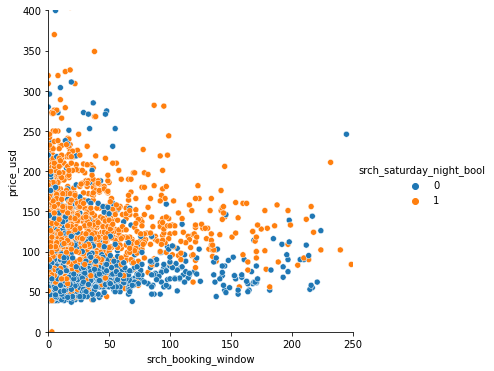

In [29]:
# Scatterplot arguments
sns.relplot(x='srch_booking_window', y='price_usd', data=df,
           hue='srch_saturday_night_bool')   # Color by evolution stage

# Tweak using Matplotlib
plt.ylim(0, 400)
plt.xlim(0, 250)

Hotel searches that include a Saturday night stay are generally price higher than hotel searches that do not include a Saturday night stay. This means customers spend more on a hotel stay if it includes weekend nights, and pay less if it booking window from hotal stay is larger.

Now that I see the relationship between our two numerical variables, we can assess their individual distributions and their relation to the 'srch_saturday_night_bool'.

Lets plot the histograms of hotel prices searched and search booking window

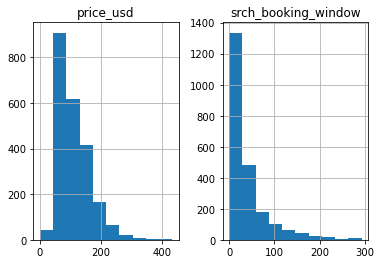

In [30]:
# Histogram
df.hist(column=['price_usd','srch_booking_window'])
plt.show()

Both histograms show the distribution that suffers from left skewness, and that prices and search booking window suffer from outliers of hotels with higher prices and had more search traffic. 

To see how this time series data has been skewed, I can use a highly correlated variable like 'srch_saturday_night_bool' to distinguish the frequency of prices if the hotel search included a Saturday night stay or not.  

Plot 'srch_saturday_night_bool' and the prices by creating a bar graph:

[]

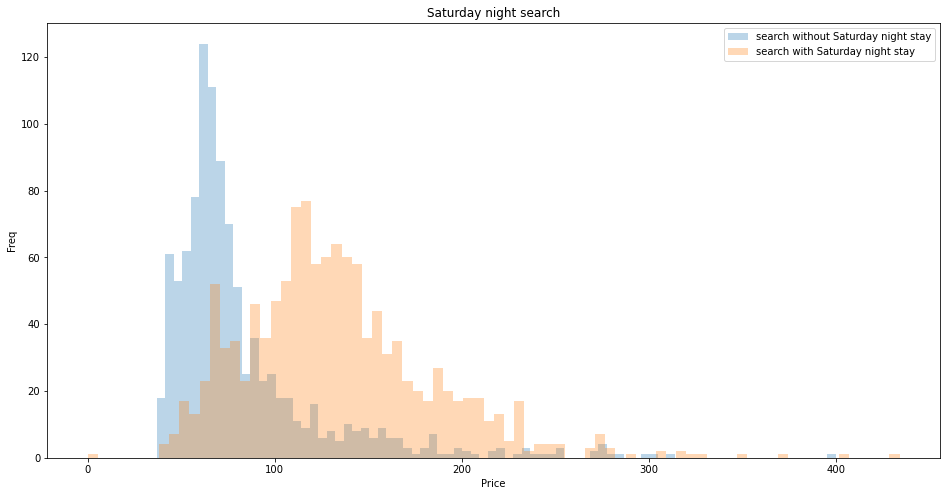

In [31]:
a = df.loc[df['srch_saturday_night_bool'] == 0, 'price_usd']
b = df.loc[df['srch_saturday_night_bool'] == 1, 'price_usd']

plt.figure(figsize = (16, 8))

plt.hist(a, bins = 80, 
         alpha = 0.3, 
         label = 'search without Saturday night stay')

plt.hist(b, bins = 80, 
         alpha = 0.3, 
         label = 'search with Saturday night stay')

plt.xlabel('Price')
plt.ylabel('Freq')
plt.legend()
plt.title('Saturday night search')
plt.plot()

There seems to be some strong relation between price and search without Saturday night stay, which can be clearly seen by the peak.

Plot 'price_usd' and 'srch_booking_window' on a distribution plot visualizing the univariate or bivariate distribution of data.

C:\Users\14087\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\14087\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


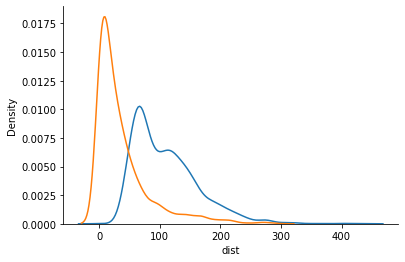

In [32]:
sns.distplot(df['price_usd'], 
                 hist = False, label = 'USD')

sns.distplot(df['srch_booking_window'], 
                  hist = False, label = 'booking window')

plt.xlabel('dist')
sns.despine()

Similarly to the histogram plot, there seems to be a strong relation between the distribution of hotel prices and booking window in the lower bin [0, 100].

To get a better grasp of some potential outliers in our time series dataset, I can use a box and whisker plot to see a five-number summary of the set of data. Seeing this five-number summary will help to distinguish outliers. 

Plot 'price_usd' and 'srch_booking_window' on a box and whisker plot visualizing columns in the dataframe on a single figure

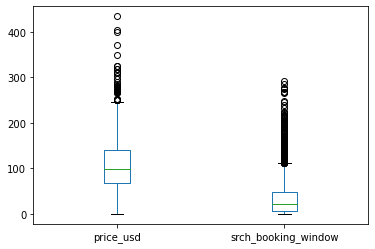

In [33]:
#Displaying columns in the dataframe on a single figure
df[['price_usd','srch_booking_window']].plot(kind='box');

The distribution of search booking window has a smaller range of time series data than the spread of hotel prices. 

There are also a large amount of outliers from both box and whisker plots suggesting that exorbitant hotel prices and number of searches happens frequently. 

Lets plot to see the distribution of hotel prices with respect to 'srch_saturday_night_bool' as box plot

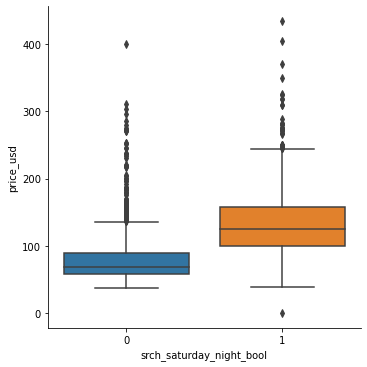

In [34]:
sns.catplot(y='price_usd', x='srch_saturday_night_bool', data=df, kind='box')

The distribution of hotel booking search with a Saturday night stay has a wider spread and higher average hotel price. 

The large number of outliers still remain, but the hotel booking search without a Saturday night stay had greater number of outlier prices. This suggests that the hotel searches without a weekend stay have a wider distribution of prices.

Plot multiple pairwise distribution of hotel prices with respect to 'srch_saturday_night_bool'

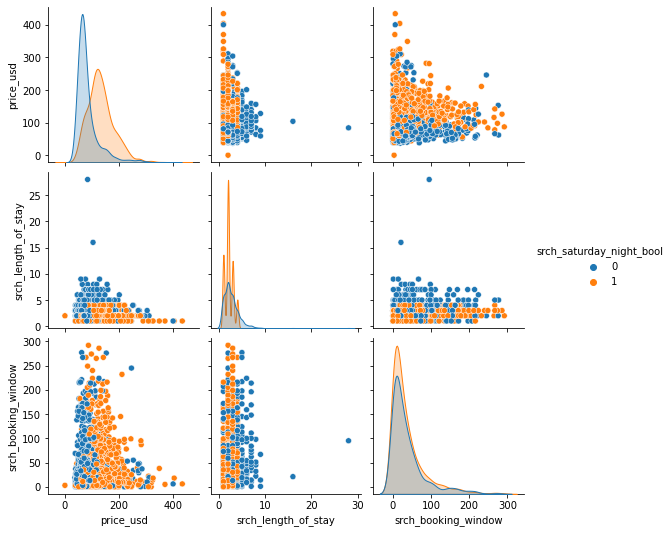

In [35]:
sns.pairplot(df, hue='srch_saturday_night_bool')

The distributions of the Expedia hotel search variables against the hotel price are displayed along with the boolean variable that determine if the Saturday night stay was included in the booking search. 

From these visualizations above, it is clear that I must transform the data to lower noise and improve the time series forecasting overall. However, it can be difficult to select the best transform for the given prediction problems.

- Predicting future hotel prices based on the number of hotel booking searches.
- Predicting future hotel prices based on the number of days customer stay.
- Predicting future hotel prices based on whether the hotel booking included a weekend stay.

# Expedia Hotel Search Dataset: Feature Engineering

In the following cells, I will re-framed time series data as a supervised learning dataset from the Expedia Hotel Search Dataset. I must choose the variable to be predicted and use feature engineering to construct all of the inputs that will be used to make predictions for future time steps. If you want to know more about this dataset, visit [Kaggle.com](https://www.kaggle.com/competitions/expedia-personalized-sort).

Let's go ahead and load the dataset specifying the time series forecasting variables above. Using the time series information of predictive variables will need to be coupled with additional engineered features that may ultimately result in a better model. 

##### Lag Features

The simplest approach is to predict the price of the hotel at the next time (t+1) given the value at the current time (t). The supervised learning problem with shifted hotel prices looks as follows:

In [36]:
from pandas import concat
price = pd.DataFrame(df, columns=['price_usd'])
df_new = concat([price.shift(1), price], axis=1)
df_new.columns = ['t', 't+1']
print(df_new.head(5))

           t    t+1
3152     NaN  186.0
10560  186.0  246.0
11127  246.0   52.0
19171   52.0   68.0
25358   68.0   46.0


I can expand the window width and include more lagged features. This can be modified to include the last 3 observed prices to predict the value at the next time step.


In [37]:
price = pd.DataFrame(df, columns=['price_usd'])
df_new = concat([price.shift(3), price.shift(2), price.shift(1), price], axis=1)
df_new.columns = ['t-2', 't-1', 't', 't+1']
print(df_new.head(5))

         t-2    t-1      t    t+1
3152     NaN    NaN    NaN  186.0
10560    NaN    NaN  186.0  246.0
11127    NaN  186.0  246.0   52.0
19171  186.0  246.0   52.0   68.0
25358  246.0   52.0   68.0   46.0


I must discard the first few rows that do not have enough data to train a supervised model. How large should I make the window for this problem?

Here are the values in the first three rolling windows:

In [38]:
price = pd.DataFrame(df, columns=['price_usd'])
shifted = price.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
df_new = concat([means, price], axis=1)
df_new.columns = ['mean(t-1,t)', 't+1']
print(df_new.head(5))

       mean(t-1,t)    t+1
3152           NaN  186.0
10560          NaN  246.0
11127        216.0   52.0
19171        149.0   68.0
25358         60.0   46.0


I can see that the first two rows are not useful. The values in the first 5 windows suggests that we would not expect usable data until at least the 5th row.

To prove this, I can use the concat() function to construct a new dataset with just our new columns and a window size of 3.

In [39]:
price = pd.DataFrame(df, columns=['price_usd'])
width = 3
shifted = price.shift(width - 1)
window = shifted.rolling(window=width)
df_new = concat([window.min(), window.mean(), window.max(), price], axis=1)
df_new.columns = ['min', 'mean', 'max', 't+1']
print(df_new.head(5))

        min        mean    max    t+1
3152    NaN         NaN    NaN  186.0
10560   NaN         NaN    NaN  246.0
11127   NaN         NaN    NaN   52.0
19171   NaN         NaN    NaN   68.0
25358  52.0  161.333333  246.0   46.0


Check the correctness of the values on the 5th row (array index 4), we can see that 61 USD is the minimum and 246 USD is the maximum of hotel prices in the window of [206.0, 186.0, 61.0].

We can still plot a scatter lag plot of this dataframe to see how accurate lag features predict hotel prices after one period. 

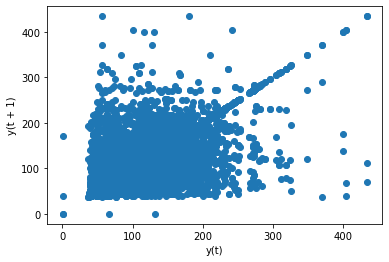

In [40]:
# Scatter Lag Plot
pd.plotting.lag_plot(df_new)
plt.show()

More spread of the hotel price values suggests a weaker relationship. This shows a relatively weak positive correlation between observations and their lag1 values.

We can create a scatter plot for the observation with each value in the previous seven days using our price dataframe.

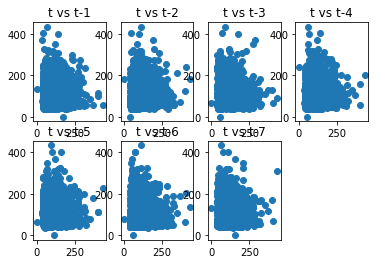

In [41]:
# Multiple Scatter Plot
values = pd.DataFrame(df, columns=['price_usd'])
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']

for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)

for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
plt.show()

This slightly positive relationship between an observation with its lag=1 value,  we can see that the trend and seasonality information extracted from the series does not seem reasonable.

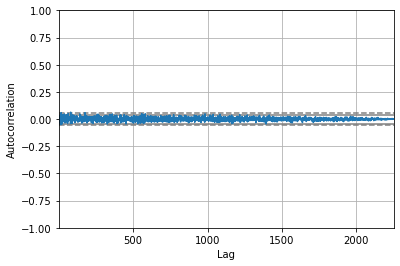

In [42]:
# Autocorrection Plot
pd.plotting.autocorrelation_plot(values)
plt.show()

Since the correlations fell to near zero, we can see cycles of no correlation. This captures the relationship of observation with past observations in the same and opposite seasons or times of the year. This suggests no seasonality trends in this data frame.


##### Log Transformation

Time series variables with an exponential distribution can be made linear by taking the logarithm of the values. There is an extreme increase on the bar graph and an equally extreme long tail distribution on the histogram.

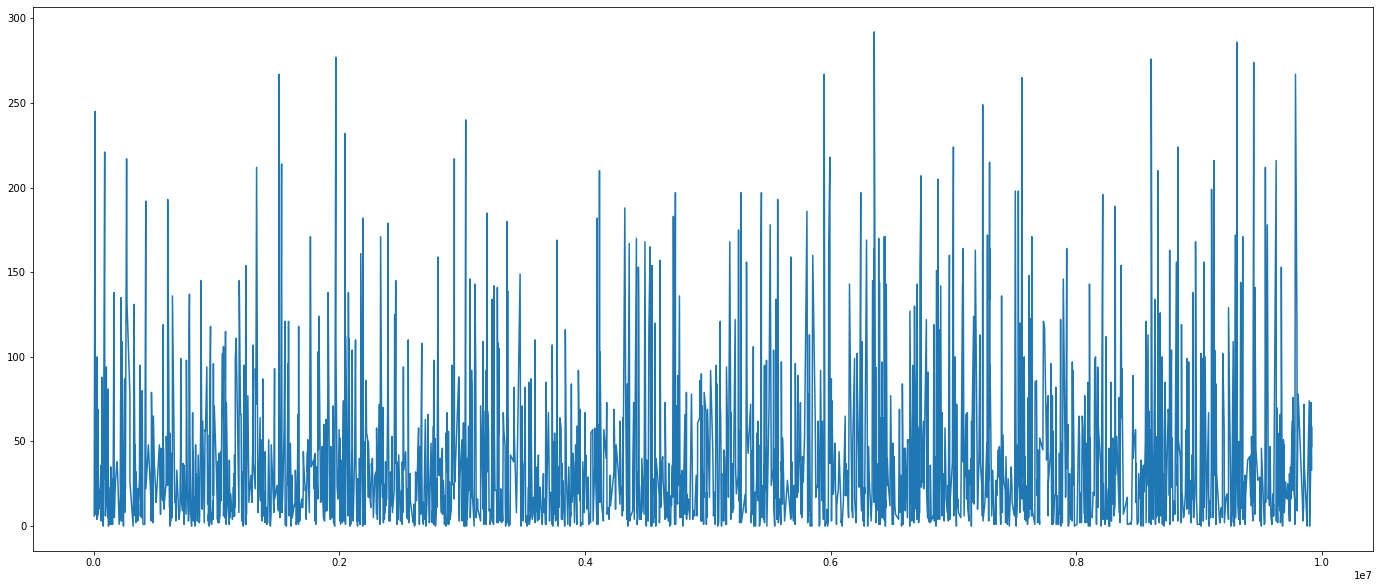

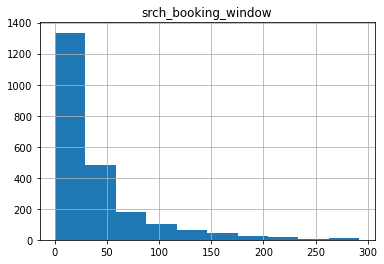

In [110]:
fig = plt.figure(figsize = (24,10))
# Line Plot
plt.plot(df['srch_booking_window'])
# Histogram
df.hist(column=['srch_booking_window'])
plt.show()

The dataset is non-stationary!

This means that the mean and the variance of the observations change over time. This is caused by what appears to be both an seasonality component.

In [111]:
log_var = ['srch_booking_window']

We can expect a logarithmic transform to change the distribution of observations to be perhaps nearly Gaussian.

<AxesSubplot:ylabel='Frequency'>

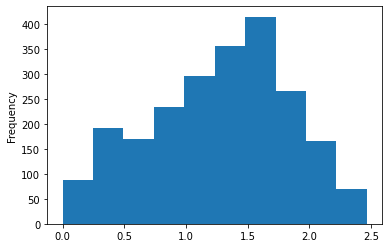

In [112]:
for j in range(len(log_var)):
    var = log_var[j]
    transformed = "log_" + var
    df[transformed] = np.log10(df[var]+1)
    
sub = fig.add_subplot(2, 5, j + 1)
sub.set_xlabel(var)
df[transformed].plot(kind = 'hist')

We see that the logarithmic transform changes the distribution of observations to be Gaussian.

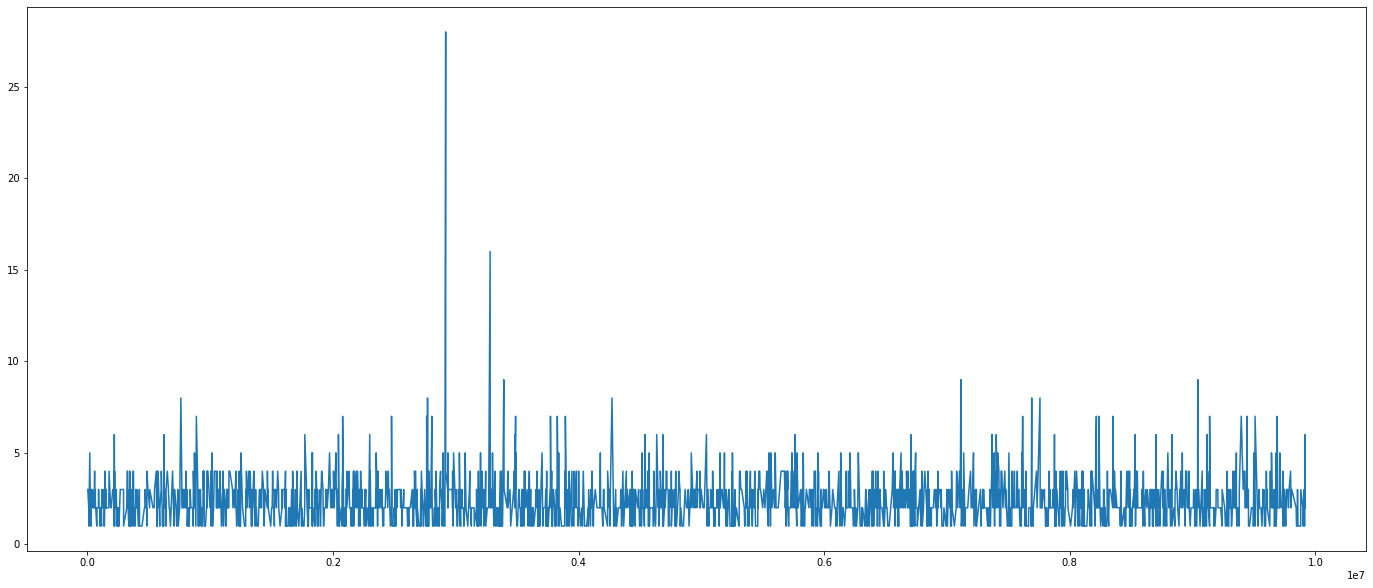

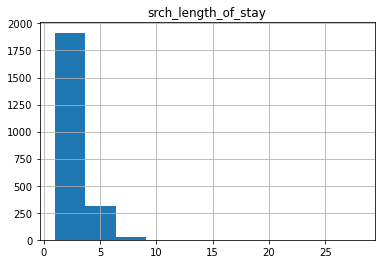

In [113]:
fig = plt.figure(figsize = (24,10))
# Line Plot
plt.plot(df['srch_length_of_stay'])
# Histogram
df.hist(column=['srch_length_of_stay'])
plt.show()

The dataset is non-stationary!

This means that the mean and the variance of the observations change over time. This is caused by what appears to be both an seasonality component.

In [114]:
log_var = ['srch_length_of_stay']

We can expect a logarithmic transform to change the distribution of observations to be perhaps nearly Gaussian.

<AxesSubplot:ylabel='Frequency'>

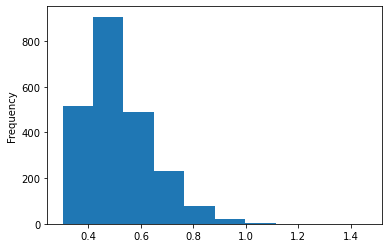

In [115]:
for j in range(len(log_var)):
    var = log_var[j]
    transformed = "log_" + var
    df[transformed] = np.log10(df[var]+1)
    
sub = fig.add_subplot(2, 5, j + 1)
sub.set_xlabel(var)
df[transformed].plot(kind = 'hist')

We see that the logarithmic transform changes the distribution of observations to be nearly Gaussian.

The histogram still contains right-skewness suggesting that there is a larger number of occurrences of the lower number of days spent in a hotel and only a few numbers occurrences of the higher number of days spent in a hotel.

In [116]:
df.drop(columns=['srch_booking_window','srch_length_of_stay'], inplace=True)
df.head(5)

,date_time,price_usd,srch_saturday_night_bool,log_srch_booking_window,log_srch_length_of_stay
3152,2013-01-03 20:48:24,186.0,0,0.845098,0.602060
10560,2013-04-29 09:39:50,246.0,0,2.390935,0.477121
11127,2013-03-25 19:43:44,52.0,0,0.903090,0.301030
19171,2013-05-19 19:52:42,68.0,0,1.633468,0.778151
25358,2012-11-14 17:18:51,46.0,0,0.698970,0.301030


##### Moving Average Smoothing

Smoothing the time series data to remove the fine-grained variation between
time steps seen in the lag features. Hope is to reduce noise and improve the signal in time series forecasting.

In [51]:
lagprice = pd.DataFrame(df, columns=['date_time','price_usd'])

In [52]:
lagprice.head(1)

,date_time,price_usd
3152,2013-01-03 20:48:24,186.0


I need to make sure that the hotel prices is converted to a numeric data type and the DatetimeIndex has no missing values.

In [53]:
lagprice.index = pd.to_datetime(lagprice.index, errors = 'coerce')
lagprice = lagprice[~pd.isnull(lagprice.index)]
lagprice['price_usd'] = pd.to_numeric(lagprice['price_usd'])

In [54]:
lagprice.drop(columns=['date_time'], inplace=True)
lagprice.head(1)

,price_usd
1970-01-01 00:00:00.000003152,186.0


A moving average requires that you specify a window size called the window width. This defines the number of raw observations used to calculate the moving average value.

In [55]:
# create expanding window features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
dfw = DataFrame(lagprice, columns=['price_usd'])
window = dfw.expanding()
dfw_new = concat([window.min(), window.mean(), window.max(), dfw.shift(-1)], axis=1)
dfw_new.columns = ['min', 'mean', 'max', 't+1']
print(dfw_new.head(5))

                                 min        mean    max    t+1
1970-01-01 00:00:00.000003152  186.0  186.000000  186.0  246.0
1970-01-01 00:00:00.000010560  186.0  216.000000  246.0   52.0
1970-01-01 00:00:00.000011127   52.0  161.333333  246.0   68.0
1970-01-01 00:00:00.000019171   52.0  138.000000  246.0   46.0
1970-01-01 00:00:00.000025358   46.0  119.600000  246.0   50.0


The moving average can be used as a source of new information when modeling a time series forecast as a supervised learning problem

In [56]:
# moving average smoothing as feature engineering
from pandas import concat
dfs = DataFrame(lagprice, columns=['price_usd'])
width = 3
lag1 = dfs.shift(1)
lag3 = dfs.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
df_new = concat([means, lag1, dfs], axis=1)
df_new.columns = ['mean', 't', 't+1']
print(df_new.head(10))

                                     mean      t    t+1
1970-01-01 00:00:00.000003152         NaN    NaN  186.0
1970-01-01 00:00:00.000010560         NaN  186.0  246.0
1970-01-01 00:00:00.000011127         NaN  246.0   52.0
1970-01-01 00:00:00.000019171         NaN   52.0   68.0
1970-01-01 00:00:00.000025358  161.333333   68.0   46.0
1970-01-01 00:00:00.000026107  122.000000   46.0   50.0
1970-01-01 00:00:00.000027061   55.333333   50.0  122.0
1970-01-01 00:00:00.000029088   54.666667  122.0  209.0
1970-01-01 00:00:00.000034421   72.666667  209.0   89.0
1970-01-01 00:00:00.000036093  127.000000   89.0   66.0


We can use moving average can be used to make a naive prediction where it assumes that the trend and seasonality has been removed or adjusted for. I hope to use this model to gauge how well my engineered features are doing at predicting my target variable of hotel prices.

predicted=161.333333, expected=68.000000
predicted=122.000000, expected=46.000000
predicted=55.333333, expected=50.000000
predicted=54.666667, expected=122.000000
predicted=72.666667, expected=209.000000
predicted=127.000000, expected=89.000000
predicted=140.000000, expected=66.000000
predicted=121.333333, expected=111.000000
predicted=88.666667, expected=115.000000
predicted=97.333333, expected=43.000000
predicted=89.666667, expected=66.000000
predicted=74.666667, expected=64.000000
predicted=57.666667, expected=43.000000
predicted=57.666667, expected=68.000000
predicted=58.333333, expected=78.000000
predicted=63.000000, expected=73.000000
predicted=73.000000, expected=64.000000
predicted=71.666667, expected=76.000000
predicted=71.000000, expected=73.000000
predicted=71.000000, expected=62.000000
predicted=70.333333, expected=68.000000
predicted=67.666667, expected=90.000000
predicted=73.333333, expected=58.000000
predicted=72.000000, expected=46.000000
predicted=64.666667, expected=1

predicted=166.666667, expected=99.000000
predicted=155.666667, expected=64.000000
predicted=95.000000, expected=116.000000
predicted=93.000000, expected=114.000000
predicted=98.000000, expected=64.630000
predicted=98.210000, expected=100.000000
predicted=92.876667, expected=108.000000
predicted=90.876667, expected=44.000000
predicted=84.000000, expected=120.000000
predicted=90.666667, expected=96.000000
predicted=86.666667, expected=125.000000
predicted=113.666667, expected=108.000000
predicted=109.666667, expected=111.000000
predicted=114.666667, expected=44.000000
predicted=87.666667, expected=141.000000
predicted=98.666667, expected=159.000000
predicted=114.666667, expected=43.000000
predicted=114.333333, expected=131.010000
predicted=111.003333, expected=62.000000
predicted=78.670000, expected=215.000000
predicted=136.003333, expected=94.000000
predicted=123.666667, expected=148.000000
predicted=152.333333, expected=108.000000
predicted=116.666667, expected=220.000000
predicted=158

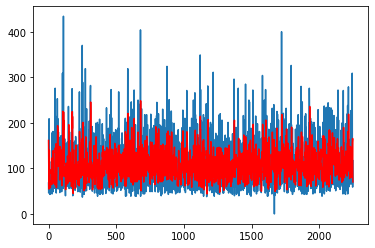

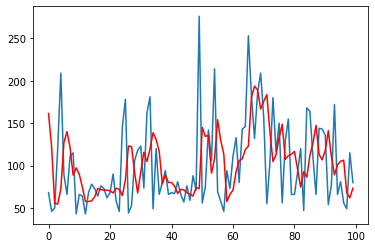

In [57]:
# moving average smoothing as a naive forecast model
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
# prepare situation
X = lagprice['price_usd']
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
# zoom plot
plt.plot(test[:100])
plt.plot(predictions[:100], color='red')
plt.show()

As new observations are made available (e.g. daily), the model can be updated and a prediction made for the next day. This result shows a root mean squared error (RMSE) of 61.67 USD per hotel booking search.

The first line plot of the Expedia Hotel Search dataset (blue) with a moving average prediction (red). These raw observations are plotted with the moving average transform overlaid.

In the second line plot, you can clearly see the lag in the transformed dataset plotting the first 100 observations from the Expedia Hotel Search Dataset (blue) with a moving average prediction (red).


# Expedia Hotel Search Dataset: Feature Selection

### Define training and testing sets

Before beginning to engineer our features, it is important to define our training and testing set. When we engineer features, some techniques learn parameters from data. It is important to learn this parameters only from the train set. This is to avoid over-fitting. 

In [171]:
df.head(5)

,date_time,price_usd,srch_saturday_night_bool,log_srch_booking_window,log_srch_length_of_stay
3152,2013-01-03 20:48:24,186.0,0,0.845098,0.602060
10560,2013-04-29 09:39:50,246.0,0,2.390935,0.477121
11127,2013-03-25 19:43:44,52.0,0,0.903090,0.301030
19171,2013-05-19 19:52:42,68.0,0,1.633468,0.778151
25358,2012-11-14 17:18:51,46.0,0,0.698970,0.301030


Set the DatetimeIndex for the subset training set using set_index() function  

In [172]:
df_new = df.set_index('date_time')          
print(df_new)

                     price_usd  srch_saturday_night_bool  \
date_time                                                  
2013-01-03 20:48:24      186.0                         0   
2013-04-29 09:39:50      246.0                         0   
2013-03-25 19:43:44       52.0                         0   
2013-05-19 19:52:42       68.0                         0   
2012-11-14 17:18:51       46.0                         0   
...                        ...                       ...   
2013-01-02 19:36:56      107.0                         1   
2013-02-23 12:27:10       81.0                         0   
2012-11-17 17:53:21       59.0                         0   
2013-04-26 18:52:31       71.0                         0   
2013-02-23 11:03:49      117.0                         1   

                     log_srch_booking_window  log_srch_length_of_stay  
date_time                                                              
2013-01-03 20:48:24                 0.845098                 0.602060  
201

Extract feature matrix and target array

In [173]:
X = df_new.drop('price_usd', axis=1)
X.head()

,srch_saturday_night_bool,log_srch_booking_window,log_srch_length_of_stay
date_time,,,
2013-01-03 20:48:24,0,0.845098,0.602060
2013-04-29 09:39:50,0,2.390935,0.477121
2013-03-25 19:43:44,0,0.903090,0.301030
2013-05-19 19:52:42,0,1.633468,0.778151
2012-11-14 17:18:51,0,0.698970,0.301030


In [174]:
y = df_new['price_usd']
y.head()

date_time
2013-01-03 20:48:24    186.0
2013-04-29 09:39:50    246.0
2013-03-25 19:43:44     52.0
2013-05-19 19:52:42     68.0
2012-11-14 17:18:51     46.0
Name: price_usd, dtype: float64

**Separating the data into train (70%) and test (30%) involves randomness, therefore, we need to set the seed.**

In [175]:
from sklearn.model_selection import train_test_split
pd.pandas.set_option('display.max_columns', None)

In [176]:
# Remember to set the seed (random_state for this sklearn function)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('The shape of X_train is: {}'.format(X_train.shape))
print('The shape of X_test is: {}'.format(X_test.shape))
print('The shape of y_train is: {}'.format(y_train.shape))
print('The shape of y_test is: {}'.format(y_test.shape))

The shape of X_train is: (1576, 3)
The shape of X_test is: (676, 3)
The shape of y_train is: (1576,)
The shape of y_test is: (676,)


To assess the selection of features in this Expedia Search Dataset, we can run a linear regression model to evaluate the predictive capabilities of explanatory hotel characteristics on hotel prices.

Apply linear regression model

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("mean absolute error of linear regression model: ", metrics.mean_squared_error(y_pred, y_test))
print("root of mean squared error of linear regression model: ", np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

mean absolute error of linear regression model:  2094.911195251264
root of mean squared error of linear regression model:  45.77019986029408


In [67]:
model.coef_

array([50.50888214, -5.04620376,  8.59934894])

In [75]:
from sklearn.metrics import r2_score
#Predict and score the model
print(r2_score(y_pred, y_test))

-2.3297562399528324


We can see here that the linear regression fits worse than a horizontal line since R2 is negative. Note that R2 is not always the square of anything, so it can have a negative value without violating any rules of math.

# Expedia Hotel Search Dataset: Model Building

Since we have determined that a linear regression model is not good at predicting a numerical value like price, we can predict the affect of home prices on user aggregate purchasing history.

Set the DatetimeIndex for the subset training set using set_index() function for this Decision Tree  

In [182]:
df_tree = df.set_index('date_time')          
print(df_tree)

                     price_usd  srch_saturday_night_bool  \
date_time                                                  
2013-01-03 20:48:24      186.0                         0   
2013-04-29 09:39:50      246.0                         0   
2013-03-25 19:43:44       52.0                         0   
2013-05-19 19:52:42       68.0                         0   
2012-11-14 17:18:51       46.0                         0   
...                        ...                       ...   
2013-01-02 19:36:56      107.0                         1   
2013-02-23 12:27:10       81.0                         0   
2012-11-17 17:53:21       59.0                         0   
2013-04-26 18:52:31       71.0                         0   
2013-02-23 11:03:49      117.0                         1   

                     log_srch_booking_window  log_srch_length_of_stay  
date_time                                                              
2013-01-03 20:48:24                 0.845098                 0.602060  
201

The key categorical variable here is 'srch_saturday_night_bool' which tells you how many hotel residents stayed past Saturday night. 

Extract feature matrix and target array

In [183]:
X = df_tree.drop('srch_saturday_night_bool', axis=1)
X.head()

,price_usd,log_srch_booking_window,log_srch_length_of_stay
date_time,,,
2013-01-03 20:48:24,186.0,0.845098,0.602060
2013-04-29 09:39:50,246.0,2.390935,0.477121
2013-03-25 19:43:44,52.0,0.903090,0.301030
2013-05-19 19:52:42,68.0,1.633468,0.778151
2012-11-14 17:18:51,46.0,0.698970,0.301030


In [184]:
y = df_tree['srch_saturday_night_bool']
y.head()

date_time
2013-01-03 20:48:24    0
2013-04-29 09:39:50    0
2013-03-25 19:43:44    0
2013-05-19 19:52:42    0
2012-11-14 17:18:51    0
Name: srch_saturday_night_bool, dtype: int64

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  

#### Classifier training and evaluation in classification prediction using cross-validation

In [186]:
from sklearn.model_selection import KFold

In [187]:
nfolds = 10

In [188]:
kf = KFold(n_splits=nfolds, random_state=0, shuffle=True)

In [189]:
avgCV_AUC = sk.model_selection.cross_val_score(cl, X, y, cv=kf, n_jobs=-1, scoring='roc_auc').mean()

In [190]:
avgCV_AUC

0.8260215305544684

The average accuracy of each model selected is 82.6%. We can finalize which classification prediction to use by comparing the classifiers for this classification prediction problem.

#### Comparing classifiers in classification prediction

Several classifiers included in the sklearn package

In [191]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

clfs = [DecisionTreeClassifier(), sk.ensemble.RandomForestClassifier(n_jobs=-1), sk.naive_bayes.GaussianNB(),
        sk.linear_model.LogisticRegression(n_jobs=-1),sk.tree.DecisionTreeClassifier(),sk.ensemble.AdaBoostClassifier(),
        QuadraticDiscriminantAnalysis(),MLPClassifier(),SVC()]

Compare the classifiers' performances in terms of average AUC

In [192]:
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = sk.model_selection.cross_val_score(cl, X, y, cv=kf, n_jobs=-1, scoring='roc_auc').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier() 0.7584389605331121
RandomForestClassifier(n_jobs=-1) 0.8632304907976301
GaussianNB() 0.8283509945710927
LogisticRegression(n_jobs=-1) 0.8314412248305235
DecisionTreeClassifier() 0.755968754619197
AdaBoostClassifier() 0.8605295766377596
QuadraticDiscriminantAnalysis() 0.8278826942927069
MLPClassifier() 0.8353410503638077
SVC() 0.8260215305544684
***********************************************
Best is... RandomForestClassifier(n_jobs=-1) 0.8632304907976301


The Random Forest Classification model has the highest accuracy score at 86.32% in terms of average AUC. 

### Random Forest Classifier

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [203]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=2, random_state=0) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [204]:
# using metrics module for accuracy calculation
from sklearn import metrics 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8121301775147929


In creating a Random Forst Classifier to estimate 100 trees, a maximum depth of 2 leaves, and ensuring it is in a random state, the accuracy of the classifier model is well above 80%.

### Decision Tree

#### Choose decision tree classifer: `DecisionTreeClassifier`

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [118]:
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=0)

In [119]:
df.keys()

Index(['date_time', 'price_usd', 'srch_saturday_night_bool',
       'log_srch_booking_window', 'log_srch_length_of_stay'],
      dtype='object')

In [124]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

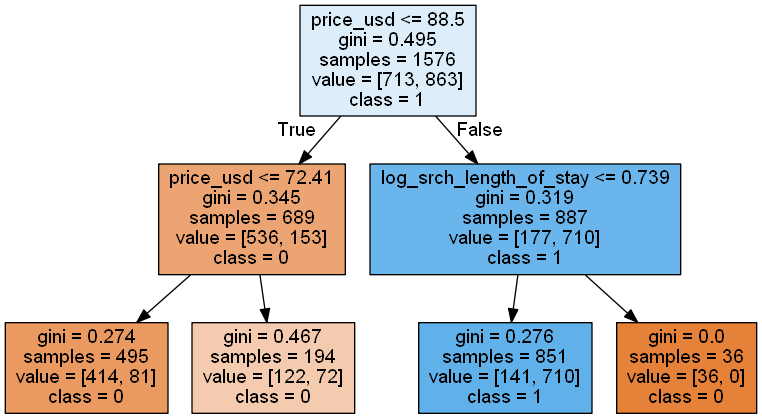

In [125]:
# This code will visualize a decision tree clf, trained with the attributes in X and the class labels in Y
from IPython.display import Image  
import pydotplus
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in y.unique()]
tree.export_graphviz(clf, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png(), width=700)

##### Interpret the decision tree result 

In the first node, the hotel price that falls below and equal to 88.5 USD has 1576 samples. The hotel prices that satisfies condition was 863 hotel prices, while 713 hotel prices did not.

In the right second node, the first node splits the customer length of stay that falls below 5 nights (10^0.739 equals about 5) with a sample of 180 instances. 

- The customer length of stay that rises above 5 nights has a 710 sample.
- The customer length of stay that falls below and equal to 5 nights has a 177 sample.

This means that hotel prices that were above 88.5 USD and stay at a hotel shorter than 5 nights result in 177 customers who stayed for a Saturday night stay.

In the left second node, the first node splits the hotel prices that were less than and equal to 72 USD with a sample of 689 instances.

- The hotel prices below and equal 72 USD has a 536 sample size with a Saturday night stay.
- The hotel prices above 72 USD has a 153 sample size with a Saturday nigth stay.

This means that prices that fell below 72 USD had a 491 sample size that included a Saturday night stay.

Given this decision tree model, we can use it to predict the values for the target variable, which is a customer staying in a hotel over the weekend and over 4 nights.  

In [126]:
y_test_predict = clf.predict(X_test)
y_test_predict

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict)

0.8017751479289941

##### Interpret Accuracy Score of Decision Tree

The accuracy of the decision tree model at predicting hotel prices with a Saturday night stay is above 80%.

### Logistic Regression

The logistic regression can be used as a linear model for classification rather than regression. Despite the unpredictability of the previous linear regression, we can see in comparing classifiers that the logistic regression has an accuracy level greater than 80%.

#### Choose model: `sklearn.linear.LogisticRegression`

In [135]:
from sklearn.linear_model import LogisticRegression

In [156]:
model = LogisticRegression(solver='liblinear')

In [157]:
model.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [158]:
y_test_pred = model.predict(X_test)
y_test_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,

#### Logistic Regression: Classification Metrics

In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       307
           1       0.81      0.79      0.80       369

    accuracy                           0.78       676
   macro avg       0.78      0.78      0.78       676
weighted avg       0.78      0.78      0.78       676



#### Interpret Classification Metrics from Logistic Regression

It shows our precision, recall, and F-1 major for each category. Support means the sample size of 676 instances. Out of the 676 instances, 313 of them are in category 0 and 363 in category 1.

##### In the categories that were 0:
- The precision is 0.74 is the ratio of hotel stays with a Saturday night stay that were predicted to be true, which is not great.
- The recall is 0.81 is the ratio of hotel stays with a Saturday night stay identified from those that had real Saturday night stays, which is better.
- The f-1 score is 0.78 which follows the high precision and recall. The f-1 score is still far away from 1 indicates a classification model that could be improved upon.

##### In the categories that were 1:
- The precision is 0.81 is the ratio of hotel stays with a Saturday night stay that were predicted to be true, which is good.
- The recall is 0.79 is the ratio of hotel stays with a Saturday night stay identified from those that had real Saturday night stays, which is still good.
- The f-1 score is 0.80 which follows the high precision and recall. The f-1 score is closer to 1, which indicates the classification model is improving.

### Partition Method (K-Means) Clustering Model

The classification and regression models above predict whether a customer stayed at a hotel through Saturday against hotel prices and other user aggregate purchasing history. 

In a clustering mode, we can evaluate the unsupervised learning problem of customer segmentation - whether their hotel search included a Saturday night stay and over 4 nights - based on similar explanatory variables. 

In [216]:
df.keys()

Index(['date_time', 'price_usd', 'srch_saturday_night_bool',
       'log_srch_booking_window', 'log_srch_length_of_stay'],
      dtype='object')

##### Apply the KMeans clustering algorithm to identify 2 clusters of hotel searches

In [217]:
df2=pd.DataFrame.copy(df_new)

In [218]:
df2 = df2.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

In [219]:
df2.fillna(0, inplace=True)

In [220]:
df2.head(5)

,price_usd,srch_saturday_night_bool,log_srch_booking_window,log_srch_length_of_stay
0,186.0,0.0,0.845098,0.602060
1,246.0,1.0,2.390935,0.477121
2,52.0,0.0,0.903090,0.301030
3,68.0,0.0,1.633468,0.778151
4,46.0,0.0,0.698970,0.698970


In [221]:
# to divide train and test set
from sklearn.model_selection import train_test_split
X = df2.drop('srch_saturday_night_bool', axis=1)
y = df2['srch_saturday_night_bool']
# Remember to set the seed (random_state for this sklearn function)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [222]:
from sklearn.cluster import KMeans

In [223]:
clu = KMeans(n_clusters=3, random_state=0)

In [224]:
clu

KMeans(n_clusters=3, random_state=0)

In [225]:
model = clu.fit(X_train, y_train)

In [226]:
model.labels_

array([2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 2,
       1, 2, 0, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 0, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0,
       1, 2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1])

#### Compare clustering methods based upon silhouette score

In [227]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

bestSil = -1
for k in range(2,6):
    print ('k = %d ' % k)
    clus = [KMeans(n_clusters=k), AgglomerativeClustering(n_clusters=k)]
    for cl in clus:
        res = cl.fit(df2)
        sil = metrics.silhouette_score(df2, res.labels_)
        print (str(cl)[:5] + ' with k = ' +str(k) + ": " + str(round(sil,4)))
        if (sil > bestSil):
            bestSil = sil
            bestCl = cl
            bestK = k
print('***********************************************')
print ('Best algorithm is... ' + str(bestCl)[:6] + '  with k = ' +str(bestK) )
print('**********************')
print ('With Silhouette Score ' + str(bestSil))

k = 2 
KMean with k = 2: 0.5946
Agglo with k = 2: 0.5931
k = 3 
KMean with k = 3: 0.5559
Agglo with k = 3: 0.5671
k = 4 
KMean with k = 4: 0.5592
Agglo with k = 4: 0.5417
k = 5 
KMean with k = 5: 0.5416
Agglo with k = 5: 0.4923
***********************************************
Best algorithm is... KMeans  with k = 2
**********************
With Silhouette Score 0.5945659286427486


With a silhouette score of 0.59 is the distance between the cluster of hotel prices with and without a Saturday night stay, which indicates the our clustering model is far from being a perfect cluster.